In [1]:
import numpy as np
import xarray as xr
from modules.integrator import forward_euler_final
from modules.classes import Quantity2D, Analytic, Interpolate
from modules.tests import plot_mass_conservation
import matplotlib.pyplot as plt

# Initialize a constant diffusion coefficient function
diffusion = Analytic(lambda x, y: x*y)
diffusion.set_partial_x(lambda x, y: y)
diffusion.set_partial_y(lambda x, y: x)

In [2]:
#case witht the D=0
diffusion = Analytic(lambda x, y: 1)
diffusion.set_partial_x(lambda x, y: 0) #setting our dx and dy is 0
diffusion.set_partial_y(lambda x, y: 0)

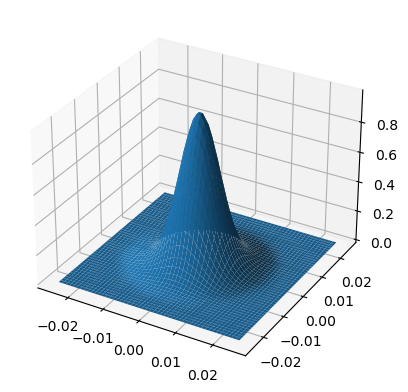

In [3]:
#giving smooth initial condition

n_grid = 50
n_time = 400
dt = 0.000001
dx = 0.001
dy = 0.001

conc = Quantity2D(
    n_grid,
    n_time,
    (-0.5*n_grid*dx, 0.5*n_grid*dx),
    (-0.5*n_grid*dy, 0.5*n_grid*dy),
    (0, dt*n_time),
)

xcoords = conc.xcoords
ycoords = conc.ycoords
X, Y = np.meshgrid(xcoords, ycoords)
initial_condition =  1*np.exp(- (X**2 + Y**2)/(0.001*dx*n_grid))
#initial_condition = np.empty_like(X)
#initial_condition[n_grid//2, n_grid//2] = 100

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, initial_condition)

In [4]:
#result_ds = forward_euler_final(conc, diffusion, initial_condition)
#result_ds

#xr.plot.contourf(result_ds1.isel(t=40), levels=50)

In [5]:
#xr.plot.contourf(result_ds.isel(t=40), levels=50)

(<Figure size 640x480 with 1 Axes>,
 <Axes3D: xlabel='x', ylabel='y', zlabel='z'>)

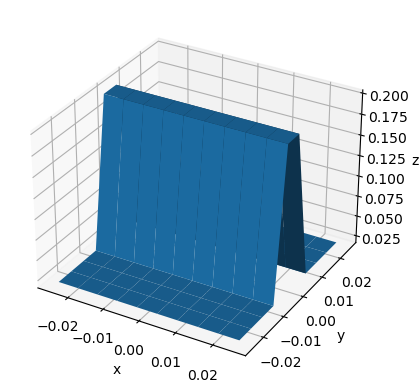

In [6]:
diffarr = 0.02*np.ones((10, 10))
diffarr[:,4:-4] = 0.2 # Vary along x; partial_x should be constant
xint = np.linspace(-0.5*n_grid*dx, 0.5*n_grid*dx, 10)
yint = np.linspace(-0.5*n_grid*dy, 0.5*n_grid*dy, 10)
diffusion1 = Interpolate(diffarr, xint, yint, s=0)

diffusion1.plot_2D(func='func')

In [7]:
result_ds1 = forward_euler_final(conc, diffusion1, initial_condition)


[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.05275481e-10 2.74054071e-10 ... 2.75574119e-10
  1.05892314e-10 0.00000000e+00]
 [0.00000000e+00 2.73873793e-10 7.12956955e-10 ... 7.13752931e-10
  2.74196799e-10 0.00000000e+00]
 ...
 [0.00000000e+00 2.74196799e-10 7.13752931e-10 ... 7.12956955e-10
  2.73873793e-10 0.00000000e+00]
 [0.00000000e+00 1.05892314e-10 2.75574119e-10 ... 2.74054071e-10
  1.05275481e-10 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.06843520e-10 2.79480311e-10 ... 2.82544312e-10
  1.08189454e-10 0.00000000e+00]
 [0.00000000e+00 2.79273221e-10 7.29820489e-10 ... 7.31384123e-10
  2.79961324e-10 0.00000000e+00]
 ...
 [0.00000000e+00 2.79961324e-10 7.31384123e-10 ... 7.29820489e-10
  2.79273221e-10 0.00000000e+00]

In [16]:
xr.plot.contourf(result_ds1.isel(t=400), levels=50)

IndexError: index 400 is out of bounds for axis 2 with size 400

2.2951098532436995e-05
4.311526241120518e-05
4.7705207765404685e-05
5.4059195526530044e-05
6.175657320413805e-05
7.068276190434384e-05
8.082632706018192e-05
9.22181710199906e-05
0.00010490890855023089
0.0001189590653928552
0.00013443426294092663
0.00015140258335890377
0.0001699329828489173
0.00019009425178558264
0.00021195428215585818
0.0002355795204309644
0.00026103454043597814
0.0002883816993853658
0.00031768085541101837
0.0003489891332586027
0.00038236072957293716
0.0004178467519640395
0.00045549508770067776
0.0004953502988878539
0.0005374535416128803
0.0005818425069445388
0.0006285513819314839
0.0006776108289238661
0.0007290479816691769
0.0007828864567299002
0.0008391463788492193
0.0008978444189594807
0.0009589938435910219
0.001022604574499081
0.001088683257385364
0.0011572333386492138
0.001228255149161546
0.0013017459941127433
0.0013777002480434525
0.0014561094542244165
0.0015369624276078513
0.0016202453606281634
0.001705941931183738
0.0017940334121838634
0.001884498782095428
0.00

(0.0, 2.0)

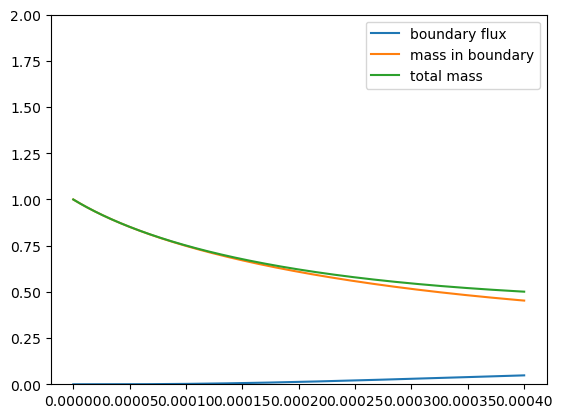

In [9]:
FIG, ax =plot_mass_conservation(result_ds1)

ax.set_ylim(0, 2)
